In [1]:
import pandas as pd
from util.interfacedb import setup_lbnl

import re 

In [2]:
## Test Building59 database

db,dbname = setup_lbnl(databaseName='building59')

mea_list = db.get_measurements_list(dbname)

print(mea_list)

['1045', '1065', '1125', '12458', '12541', '12614', '12635', '12743', '13881', '145', '165', '205', '245', '2525', '2545', '2565', '2585', '2605', '2625', '2645', '265', '2665', '2685', '2705', '2725', '2745', '2865', '2885', '2905', '2925', '2945', '2965', '2985', '305', '30934', '33336', '33400', '34222', '34242', '345', '385', '405', '425', '42808', '445', '465', '485', '505', '525', '545', '565', '625', '645', '665', '685', '705', '725', '745', '765', '785', '805', '825', '845', '865', '905', '925', '92753', '945', '965', 'CAISO_NORTH', 'CAISO_NORTH_historical', 'CAISO_ZP26', 'CAISO_ZP26_historical', 'R2_solar_train', 'R2_solar_train_ds', 'R2_solar_valid', 'R2_solar_valid_ds', 'RMSE_solar_train', 'RMSE_solar_train_ds', 'RMSE_solar_valid', 'RMSE_solar_valid_ds', 'air_temp_set_1', 'air_temp_set_2', 'alc_watchdog_59', 'alc_watchdog_76', 'altimeter_set_1d', 'aru1_hwr_temp', 'aru1_hws_fr_gpm', 'aru1_hws_temp', 'aru_001_cwr_temp', 'aru_001_cws_fr_gpm', 'aru_001_cws_temp', 'aru_001_hwr_te

In [3]:
## Test Lab wifi database

db,dbname = setup_lbnl(databaseName='wifi')

mea_list = db.get_measurements_list(dbname)

print(mea_list)

['wifi_count']


In [4]:
## Test Lab wifi database

db,dbname = setup_lbnl(databaseName='notExisted')

mea_list = db.get_measurements_list(dbname)

NameError: Database not found

## Download data from Building 59
The script used to collect data for Na

In [5]:
db,dbname = setup_lbnl(databaseName='building59')

In [12]:
# zone number mapping
zone_list_2_north = ['016','017','018','021','022','023','024','025','026','027','028']
zone_list_2_south = ['035','036','037','038','039','040','041','042','043','044']
zone_list_1_north = ['046','047','048','051','052','053','054','055','056','057', '058']
zone_list_1_south = ['063','064','065','066','067','068','069','070','071','072']
zone_list_core = ['019', '030', '032', '033', '045', '059', '061', '062', '049']

# Occ data from occ sensor
occ = ['occ_third_count','occ_fourth_count']
# occ_map = {'occ_third_count':'occ_third_south','occ_fourth_count':'occ_fourth_south'}

# Electricity data
ele = ['sub590A14A','sub590A15A','sub590A1A','sub590A2A','sub596A1A1A','sub596A1A2A']
# ele_map = {'sub590A14A':'mels_S','sub590A15A':'lig_S','sub590A1A':'lig_N',
#           'sub590A2A':'mels_N','sub596A1A1A':'hvac_N','sub596A1A2A':'hvac_S'}

# Site weather
site_weather = ['air_temp_set_'+str(i) for i in range(1,3)] + \
               ['dew_point_temperature_set_1d','relative_humidity_set_1'] + \
               ['solar_radiation_set_1']

# Economizer
economizer_re = re.compile("rtu_.*_econ_stpt_tn")
economizer = list(filter(economizer_re.match, mea_list))

# Outside Air
oa_flow_rate_re = re.compile("rtu_.*_oa_flow_tn")
oa_flow_rate = list(filter(oa_flow_rate_re.match, mea_list))

oa_damper_position_re = re.compile("rtu_.*_oadmpr_pct")
oa_damper_position = list(filter(oa_damper_position_re.match, mea_list))

oa = oa_flow_rate + oa_damper_position

# Zone: temp.
zone_temp_exterior_re = re.compile("zone_.*_temp")
zone_temp_exterior = list(filter(zone_temp_exterior_re.match, mea_list))

zone_temp_interior_re = re.compile("cerc_.*")
zone_temp_interior = list(filter(zone_temp_interior_re.match, mea_list))

# Zone: temp. setpoint
zone_temp_sp_h_re = re.compile("zone_.*_heating_sp")
zone_temp_sp_h = list(filter(zone_temp_sp_h_re.match, mea_list))

zone_temp_sp_c_re = re.compile("zone_.*_cooling_sp")
zone_temp_sp_c = list(filter(zone_temp_sp_c_re.match, mea_list))

# RTU: Supply air temp.
rtu_sa_t_sp_re = re.compile("rtu_.*_sat_sp_tn")
rtu_sa_t_sp = list(filter(rtu_sa_t_sp_re.match, mea_list))

rtu_sa_t_re = re.compile("rtu_.*_sa_temp")
rtu_sa_t = list(filter(rtu_sa_t_re.match, mea_list))

# RTU: Supply air slow rate
rtu_sa_p_sp_re = re.compile("rtu_.*_pa_static_stpt_tn")
rtu_sa_p_sp = list(filter(rtu_sa_p_sp_re.match, mea_list))

rtu_sa_fr_re = re.compile("rtu_.*_fltrd_sa_flow_tn")
rtu_sa_fr = list(filter(rtu_sa_fr_re.match, mea_list))

# UFT: supply air temp.
uft_hw_valve_re = re.compile("zone_.*_hw_valve")
uft_hw_valve = list(filter(uft_hw_valve_re.match, mea_list))

hp_hws_temp_re = re.compile(".*_hws_temp")
hp_hws_temp = list(filter(hp_hws_temp_re.match, mea_list))

# UFT: supply air flow rate
uft_fan_spd_re = re.compile("zone_.*_fan_spd")
uft_fan_spd = list(filter(uft_fan_spd_re.match, mea_list))

In [13]:
start_time = '2021-08-11'
final_time = '2021-08-12'
path_to_file = 'data/'

In [14]:
# Raw data, not resampled
def download_data_raw(data_list,file_name,start_time = start_time,final_time = final_time):
    data = pd.DataFrame()
    for field in data_list:
        data_single = db.get_data(field,dbname,start_time,final_time)
        data = pd.concat([data,data_single], axis=1)
    data.to_csv('{}/{}_raw.csv'.format(path_to_file ,file_name))

In [15]:
# Resampled data
def download_data(data_list,file_name,freq='30min',start_time = '2018-01-01',final_time = '2020-01-01'):
    data = pd.DataFrame()
    for field in data_list:
        data_single = db.get_data(field,dbname,start_time,final_time).resample(freq).mean()
        data = pd.concat([data,data_single], axis=1)
    data.to_csv('data/{}.csv'.format(file_name))

In [16]:
list_data_list = [site_weather, zone_temp_exterior, zone_temp_interior,
                  occ, ele,
                  zone_temp_sp_h, zone_temp_sp_c,
                  rtu_sa_t_sp, rtu_sa_t, oa, economizer, 
                  rtu_sa_p_sp, rtu_sa_fr,
                  uft_hw_valve, hp_hws_temp, uft_fan_spd]
list_file_name = ['site_weather', 'zone_temp_exterior', 'zone_temp_interior',
                  'occupancy', 'electricity'
                  'zone_temp_sp_h', 'zone_temp_sp_c',
                  'rtu_sa_t_sp', 'rtu_sa_t', 'outside_air', 'economizer',
                  'rtu_sa_p_sp', 'rtu_sa_fr',
                  'uft_hw_valve', 'hp_hws_temp', 'uft_fan_spd']

for data_list, file_name in zip(list_data_list,list_file_name):
    download_data_raw(data_list,file_name,start_time=start_time,final_time=final_time)

08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data for air_temp_set_1 retrieved from database dhblum.
08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data for air_temp_set_2 retrieved from database dhblum.
08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data for dew_point_temperature_set_1d retrieved from database dhblum.
08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data for relative_humidity_set_1 retrieved from database dhblum.
08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data for solar_radiation_set_1 retrieved from database dhblum.
08/16/2021 08:56:24 PM	daq.util.interfacedbWARNING	Data for occ_third_count not found in database.  Check that the key and time interval are correct and that there is data during the time interval.
08/16/2021 08:56:24 PM	daq.util.interfacedbWARNING	Data for occ_fourth_count not found in database.  Check that the key and time interval are correct and that there is data during the time interval.
08/16/2021 08:56:24 PM	daq.util.interfacedbINFO	Data 

## Download data from the WiFi database

In [17]:
%matplotlib inline

In [18]:
db_wifi,dbname_wifi = setup_lbnl(databaseName='wifi')

In [19]:
floor = lambda x: int(x.split('-')[2][0])

In [20]:
spring_wifi = db_wifi.get_data('wifi_count',dbname_wifi,start_time,final_time)
spring_count = spring_wifi[spring_wifi['building'] == '59'].resample('5T').sum()
spring_count.index = spring_count.index.tz_convert('America/Los_Angeles')
spring_count.columns=['wifi']

08/16/2021 08:56:31 PM	daq.util.interfacedbINFO	Data for wifi_count retrieved from database wifi.


<AxesSubplot:>

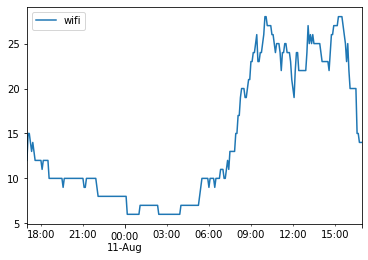

In [21]:
spring_count.plot()